In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_theme(style = 'whitegrid')
#sns.set_palette('coolwarm')
import matplotlib.pyplot as plt
from itertools import product

In [2]:
df = pd.read_csv('main_data.csv')

In [3]:
df = df[['protest', 'protesterviolence', 'reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal',
         'reasons_political', 'reasons_price', 'reasons_policebrutality']]
df.head()

,protest,protesterviolence,reasons_labor,reasons_social,reasons_land,reasons_removal,reasons_political,reasons_price,reasons_policebrutality
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [4]:
# Creating list for iterable and names for new df
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
# Initializing empty df
df_temp = pd.DataFrame()

In [5]:
# Calculates the percentage of violent protests for each reason
for reason in reasons:
    df_temp[reason] = [round((sum(df['protesterviolence'] & df[reason] > 0))/(sum(df[reason]))*100)]
    
df_temp.head()

,reasons_labor,reasons_social,reasons_land,reasons_removal,reasons_political,reasons_price,reasons_policebrutality
0,23,15,28,29,26,34,41


In [6]:
# Reformatting and renaming the df
df_percentage = df_temp.T
df_percentage.rename(index = {'reasons_social':'social reforms',
                              'reasons_policebrutality':'police brutality',
                              'reasons_land':'property',
                              'reasons_political':'law & politics',
                              'reasons_labor':'labor rights',
                              'reasons_price':'inflation',
                              'reasons_removal':'anti-authoritarian'},
                    columns = {0:'percentage'},
                    inplace = True)
df_percentage

,percentage
labor rights,23
social reforms,15
property,28
anti-authoritarian,29
law & politics,26
inflation,34
police brutality,41


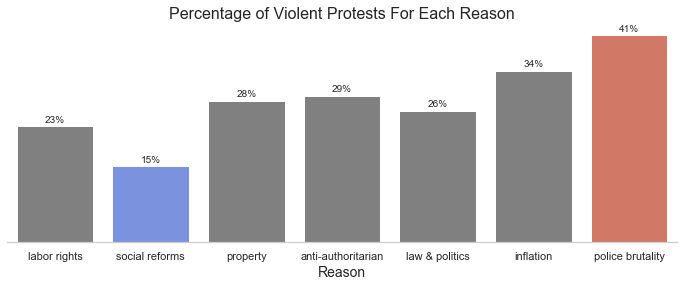

In [7]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

# Plotting
values = df_percentage['percentage']
clrs = ['#6a8bef' if (x == min(values)) else 'gray' if (x < max(values)) else '#e36c55' for x in values]

violence_plot = sns.barplot(x = df_percentage.index, y = 'percentage', data = df_percentage, ax = ax, palette = clrs)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.xlabel('Reason', size = 14)
plt.ylabel('')
plt.title('Percentage of Violent Protests For Each Reason', size = 16)
plt.grid(False)
sns.despine(left=True)
violence_plot.set(yticks=[])

None

In [8]:
# Processing the df
df = pd.read_csv('main_data.csv')
df = df[['protest', 'protesterviolence', 'reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal',
         'reasons_political', 'reasons_price', 'reasons_policebrutality']]

# Calculates percentage of violent protests for each reason
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
df_temp = pd.DataFrame()
for reason in reasons:
    df_temp[reason] = [round((sum(df['protesterviolence'] & df[reason] > 0))/(sum(df[reason]))*100)]
    
# Reformats and renames the df
df_percentage = df_temp.T
df_percentage.rename(index = {'reasons_social':'social reforms',
                              'reasons_policebrutality':'police brutality',
                              'reasons_land':'property',
                              'reasons_political':'law & politics',
                              'reasons_labor':'labor rights',
                              'reasons_price':'inflation',
                              'reasons_removal':'anti-authoritarian'},
                    columns = {0:'percentage'},
                    inplace = True)

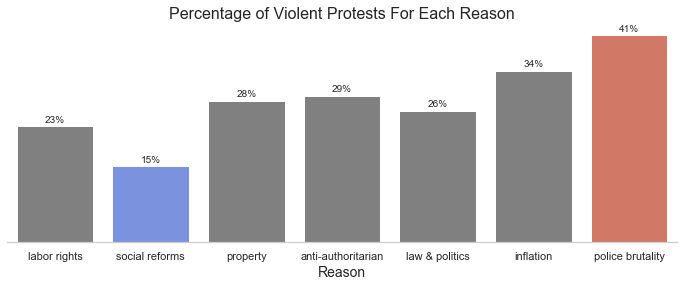

In [9]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims)

# Plotting
values = df_percentage['percentage']
clrs = ['#6a8bef' if (x == min(values)) else 'gray' if (x < max(values)) else '#e36c55' for x in values]

violence_plot = sns.barplot(x = df_percentage.index, y = 'percentage', data = df_percentage, ax = ax, palette = clrs)

for p in violence_plot.patches:
    height = int(p.get_height())
    ax.annotate('{}'.format(height) + '%', xy = (p.get_x() + p.get_width() / 2, height), xytext = (0, 2), 
                textcoords = 'offset points', ha = 'center', va = 'bottom')
                           
plt.xlabel('Reason', size = 14)
plt.ylabel('')
plt.title('Percentage of Violent Protests For Each Reason', size = 16)
plt.grid(False)
sns.despine(left=True)
violence_plot.set(yticks=[])

None